In [1]:
import sympy as sp
sp.init_printing(use_latex='mathjax')
from IPython.display import display

In [2]:
x = sp.Symbol('x', real = True)
y = sp.Symbol('y', real = True)

### Problem 1

In [3]:
fx = sp.integrate((1/102)*(x + 3*x**2*y), (y, 1, 2))
fx

                    2                        
0.0441176470588235⋅x  + 0.00980392156862745⋅x

In [4]:
fy = sp.integrate((1/102)*(x + 3*x**2*y), (x, 1, 4))
fy

0.617647058823529⋅y + 0.0735294117647059

In [5]:
Mx = sp.integrate(x*fx, (x, 1, 4))
Mx

3.01838235294118

In [6]:
My = sp.integrate(y*fy, (y, 1, 2))
My

1.55147058823529

In [7]:
Mxy = sp.integrate((x*y)*(1/102)*(x + 3*x**2*y), (x, 1, 4), (y, 1, 2))
Mxy

4.68382352941176

In [8]:
SigX = sp.integrate(x**2*fx, (x, 1, 4))-Mx**2
SigX

0.540838559688583

In [9]:
SigY = sp.integrate(y**2*fy, (y, 1, 2))-My**2
SigY

0.0806841118800454

In [10]:
COV = Mxy-Mx*My
COV

0.000892084775085955

In [11]:
rho = COV/(sp.sqrt(SigX)*sp.sqrt(SigY))
rho

0.00427049573274541

**Code on how to use sympy to calculate values for normally distributed variables.**

In [12]:
from sympy.stats import Normal, P, E, variance, cdf, density, LogNormal

In [13]:
Z=Normal('Z', 0, 1)

In [14]:
P(Z<-1).evalf()

0.158655253931457

In [15]:
E(Z)

0

In [16]:
cdf(Z)(1).evalf()

0.841344746068543

In [17]:
MS=Normal('MS', 25000, 1000)

In [18]:
cdf(MS)(29000).evalf()

0.999968328758167

In [19]:
P(MS>29000).evalf()

3.16712418331199e-5

In [20]:
Mat=Normal('Mat', 35000, 2000)

In [21]:
P(Mat<29000).evalf()

0.00134989803163009

In [22]:
cdf(Mat)(29000).evalf()

0.00134989803163009

### Problem 3, using sympy

In [23]:
YS = Normal('YS', 29.576, 2.2168)

In [24]:
P(YS>30).evalf()

0.424158328125473

In [25]:
cdf(YS)(30).evalf()

0.575841671874532

In [26]:
density(YS)(30).evalf()

0.176701268426890

### **Problem 2**  

**Stress induced in the machine during operation is normally distributed with following paramaters.**

- $\mu_S = 25000$  
- $\sigma_S = 1000$

**Material strength of the machine is also normally distributed with following paramaters.**  

- $\mu_M = 35000$  
- $\sigma_M = 2000$

**What is the probability of failure for the machine?**

**The true way to solve problem 2 is to define a new distribution using the provided distributions for operating load and material strength. If we know the two distributions are normally distributed and independent, then we can added them to form a new distribution with new paramaters $\mu$ and $\sigma$**  

**Following rules apply when adding or subtracting two distributions. In our case we are going to subtract them to define a new random variable $Z = S-M$. Then to find the probability of machine failure we calculate CDF at $Z=0$.**  

**New paramaters for $Z = S-M.$**

- Mean of Z: $\mu_Z = \mu_S - \mu_M$, gives, $\mu_Z = 25000 - 35000 = -10000$  
- Standard deviation of random variable Z $\sigma_Z = \sqrt{\sigma_S^2 + \sigma_M^2}$, gives, $\sigma_Z = \sqrt{1000^2 + 2000^2} = 2236.078$  

**Now define new distribution below and plot it. Then solve for the failure probability.**

In [28]:
from scipy.stats import lognorm, norm, gumbel_l, gumbel_r
W = norm(loc = -10000, scale = 2236.078)

In [29]:
W.cdf(0)

0.999996127529

In [30]:
Prob = 1-W.cdf(0)
Prob

3.87247128419e-06

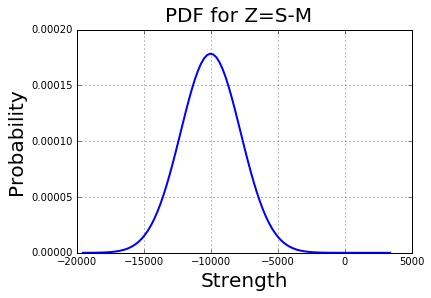

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x3 = np.linspace(W.ppf(0.00001), W.ppf(0.999999999), 100)

#ax.plot(x1, S.pdf(x1), 'r-', lw=5, alpha=0.6, label='norm pdf')

fig=plt.figure()
plt.plot(x3, W.pdf(x3), 'b-', linewidth=2)

fig.suptitle('PDF for Z=S-M', fontsize=20)
plt.xlabel('Strength', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.axis([-20000, 5000, 0.0, 0.0002])

plt.grid()
plt.show()

**For practice distributions for M and S are plotted below.**

In [32]:
from scipy.stats import lognorm, norm, gumbel_l, gumbel_r

S = norm(loc = 25000, scale = 1000)
M = norm(loc = 35000, scale = 2000)

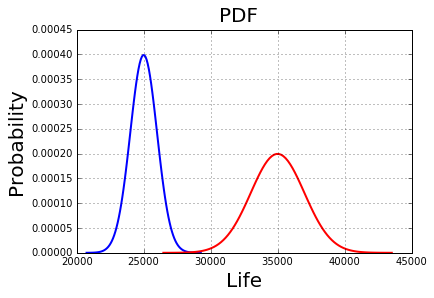

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x1 = np.linspace(S.ppf(0.00001), S.ppf(0.99999), 100)
x2 = np.linspace(M.ppf(0.00001), M.ppf(0.99999), 100)

#ax.plot(x1, S.pdf(x1), 'r-', lw=5, alpha=0.6, label='norm pdf')

fig=plt.figure()
plt.plot(x1, S.pdf(x1), 'b-', linewidth=2)
plt.plot(x2, M.pdf(x2), 'r-', linewidth=2)

fig.suptitle('PDF', fontsize=20)
plt.xlabel('Life', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.axis([20000, 45000, 0.0, 0.00045])

plt.grid()
plt.show()

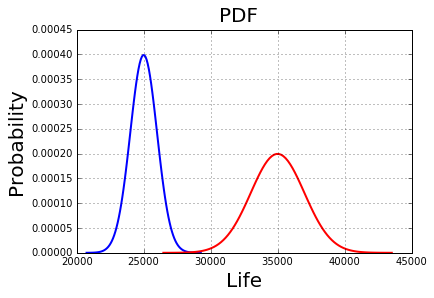

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x1 = np.linspace(S.ppf(0.00001), S.ppf(0.99999), 100)
x2 = np.linspace(M.ppf(0.00001), M.ppf(0.99999), 100)

#ax.plot(x1, S.pdf(x1), 'r-', lw=5, alpha=0.6, label='norm pdf')

fig=plt.figure()
plt.plot(x1, S.pdf(x1), 'b-', linewidth=2)
plt.plot(x2, M.pdf(x2), 'r-', linewidth=2)

fig.suptitle('PDF', fontsize=20)
plt.xlabel('Life', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.axis([20000, 45000, 0.0, 0.00045])

plt.grid()
plt.show()

### Do problem 3 assuming log normal distribution:

In [35]:
S = LogNormal('S', 29.576e6, 2.2168e6)

### Tried using LogNormal in sympy but gives errors. Something seems to be wrong with the package. Instead use scipy for now.

In [36]:
#P(S>30e6).evalf()

In [37]:
#cdf(S)(30e6)

### Get LogNormal results for problem 3 by using scipy

In [38]:
from scipy.stats import lognorm, norm, gumbel_l, gumbel_r

In [39]:
norm.cdf(30e6, loc = 29.576e6, scale = 2.2168e6)

0.575841671875

**The ppf method is the inverse of the cdf and will give the user the values of the random variable (in this case Youngs Modulus) at the upper or lower ends of the tail. In below example we know that at 1% of the area under the curve Youngs Modulus values will be 24418952 or lower.**

In [40]:
norm.ppf(0.01, loc = 29.576e6, scale = 2.2168e6)

24418952.0328

In [41]:
norm.cdf(10.8197, loc = 10.9216, scale = 0.21755)

0.319749974194

### **Above few lines is practicing using scipy functions for the normal distribution. Below is Problem 3 result using LogNormal.**

**Below is an example of using scipy to solve the example discussed in class, which is defined as follows:**  

**Car break light life follows LogNormal distribution with following mean and standard deviation:**

- $\mu_x = 56669.5$
- $\sigma_x = 12393.6$

**Find probability that life will be $\le$ 50000.**  

**First thing to be done is to transform the given paramaters for the LogNormal distribution ($\mu_X$, and $\sigma_X$) into normal distribution ($\mu_Y$, and $\sigma_Y$). This is done by following two formulas.**  

- $\mu_Y = ln(\mu_X) - \frac{\sigma_Y^2}{2}$
- $\sigma_Y^2 = ln[(\frac{\sigma_X}{\mu_X})^2 + 1]$  

**For the present example we get following values:**  

- $\mu_Y = 10.9216$
- $\sigma_Y^2 = 0.04672$

**Next, these variables are used to generate an array of random variables (rvs) with a size of 1000 in this case but can be higher or lower as desired. In the formula below loc = $\mu_Y$ and scale = $\sigma_Y$. The reason to do this is because for some ungodly reason scipy uses paramaters shape, loc, and scale, which user may not know before hand, and are needed to describe the LogNormal distribution. Therefore, before method "cdf" can be used, which uses the above listed paramaters, one needs to know these paramaters to calculate the correct probabilities as will be seen in example below.**

In [42]:
import numpy as np

#Generate a vector called logsample that has a random variable distribution. This uses mu_Y and sigma_Y
#calculated using expressions above
logsample = norm.rvs(loc=10.921, scale=np.sqrt(0.04672), size=5000) # logsample ~ N(mu=10, sigma=3)

#apply exponential to the generated logsample
sample = np.exp(logsample) # sample ~ lognormal(10, 3)

#this step calculates the necessary paramaters needed to define the LogNormal distribution
#using scipy.
shape, loc, scale = lognorm.fit(sample, floc=0) # hold location to 0 while fitting

**Paramaters $shape$, $loc$, $scale$ can be called as seen below.**

In [43]:
shape, loc, scale

(0.212588573079, 0, 55406.6572116)

**By performing below operation one can get $\mu$ and $\sigma$ for the LogNormal distribution using paramaters scale and shape.**

In [44]:
np.log(scale), shape  # mu, sigma

(10.9224550318, 0.212588573079)

**Finally, cdf method can be used knowing the required paramaters to calculate probabilities. In this case we want to know the probability that the brake light will have life less than 50000. And the answer of 31.8% closely matches result in class of 33.8%. Differences in answer are due to roundoff error.**

In [45]:
lognorm.cdf(50000, 0.2142, loc = 0, scale = 55310.237)

0.318742353101

**Code below can be used if one wishes to calculate the 4 moments of the log normal distribution.**

In [46]:
#s = 0.000001
s = .2142052
mean, var, skew, kurt = lognorm.stats(s, loc = 0, scale = 55310.237, moments='mvsk')

In [47]:
mean

array(56593.82853557895)

In [48]:
var

array(150383372.4940317)

In [49]:
np.sqrt(var)

12263.0898429

### **Now use approach from example above to solve problem 3b.**   

**$\mu_Y$ and $\sigma_Y$ values for problem 3b are listed below and are used to generate a normally distributed random variable data.**  

- $\mu_Y = 14.609$
- $\sigma_Y^2 = 5.1874$

In [50]:
norm.cdf(17.2167, loc = 14.609, scale = np.sqrt(5.1874))

0.873883009918

In [68]:
import numpy as np

#Generate a vector called logsample that has a random variable distribution. This uses mu_Y and sigma_Y
#calculated using expressions above
logsample = norm.rvs(loc=17.1997, scale=np.sqrt(0.00560), size=5000) # logsample ~ N(mu=10, sigma=3)

#apply exponential to the generated logsample
sample = np.exp(logsample) # sample ~ lognormal(10, 3)

#this step calculates the necessary paramaters needed to define the LogNormal distribution
#using scipy.
shape, loc, scale = lognorm.fit(sample, floc=0) # hold location to 0 while fitting

In [69]:
shape, loc, scale

(0.0751820788302, 0, 29489657.6282)

In [70]:
np.log(scale), shape  # mu, sigma

(17.199550171, 0.0751820788302)

**Now can use the paramaters above to calculate probability that Young's Modulus will be higher than $30e^6$.**

In [71]:
lognorm.cdf(30e6, 0.0751821, loc = 0, scale = 29489657.6282)

0.59026089272

**Extreme value problem example from the notes. To be used as a general approach to solve problem 4 from HW2.**

**10 cracks are detected in a concrete beam. X is considered as the random variable that represents crack size.**  

**Based on previous studies we know that crack size X is normally distributed with following paramaters:**  

- $\mu = 0.50$  
- $CV = 0.1$, from this we can get variance per following expression $CV = \frac{\sigma}{\mu}$, this gives $\sigma = 0.05$.  

**What is the probability that the max crack size is less than 0.6in out of 10 cracks observed.**  

**$P(x_n\le0.6) = (F_x(0.6))^n$, where $F_x$ is the CDF of the assumed distribution (in this case normal), and $n$ is the number of events (in this case 10 cracks detected.)**  

**Basically there are 10 trials where we ask ourselves what is the probability that the crack will be less than 0.6in. Therefore, we calculate the appropriate CDF for all 10 trials and multiply them together to get final answer. Hence that is the reason the result is raised to the power of n.**

In [55]:
CrackSize = norm(loc = 0.5, scale = 0.05) 

In [56]:
CrackSize.cdf(0.6)

0.977249868052

**Now following the direction of the definition above, the calculated CDF values is raised to the power of 10 (number of crack events).**  

**Expression below is the probability that the max crack size is less than 0.6in.**

In [57]:
(CrackSize.cdf(0.6))**10

0.794431040167

**Value below is the probability that the max crack size will be greater than 0.6in.**

In [58]:
1-(CrackSize.cdf(0.6))**10

0.205568959833

### Problem 4  

**The fatigue of the bolted joint in thousands of cycles is given by following PDF:**

- $f(x) = \frac{x-600}{10000}$, for $600\le x \le 700$, and
- $f(x) = \frac{800-x}{10000}$, for $700\le x \le 800$

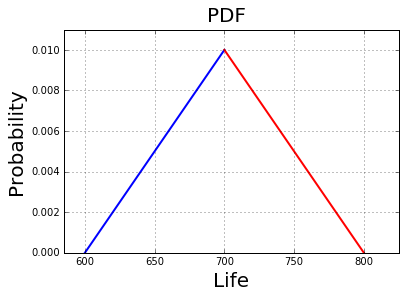

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x1 = np.linspace(600, 700, 500)
x2 = np.linspace(700, 800, 500)

fx1 = (x1-600)/10000
fx2 = (800-x2)/10000

fig=plt.figure()
plt.plot(x1, fx1, 'b-', linewidth=2)
plt.plot(x2, fx2, 'r-', linewidth=2)

fig.suptitle('PDF', fontsize=20)
plt.xlabel('Life', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.axis([585, 825, 0, 0.011])

plt.grid()
plt.show()

In [72]:
sp.integrate((x-600)/10000, x)

   2       
  x     3⋅x
───── - ───
20000    50

In [73]:
sp.integrate((800-x)/10000, x)

     2       
    x     2⋅x
- ───── + ───
  20000    25

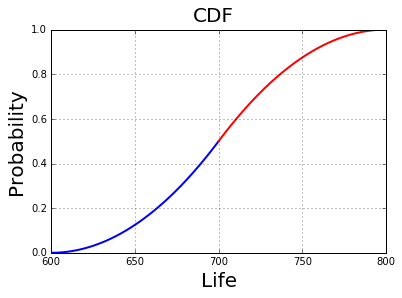

In [79]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x3 = np.linspace(600, 700, 500)
x4 = np.linspace(700, 800, 500)

Fx1 = x3**2/20000 - (3*x3)/50 + 18
Fx2 = -x4**2/20000 + (2*x4)/25 - 31

fig=plt.figure()
plt.plot(x3, Fx1, 'b-', linewidth=2)
plt.plot(x4, Fx2, 'r-', linewidth=2)

fig.suptitle('CDF', fontsize=20)
plt.xlabel('Life', fontsize=20)
plt.ylabel('Probability', fontsize=20)
#plt.axis([585, 825, 0, 0.011])

plt.grid()
plt.show()

In [81]:
n = sp.Symbol('n', real = True)

sp.diff((x**2/20000 - (3*x)/50 + 18)**n, x)

                                 n
               ⎛   2            ⎞ 
  ⎛  x     3 ⎞ ⎜  x     3⋅x     ⎟ 
n⋅⎜───── - ──⎟⋅⎜───── - ─── + 18⎟ 
  ⎝10000   50⎠ ⎝20000    50     ⎠ 
──────────────────────────────────
            2                     
           x     3⋅x              
         ───── - ─── + 18         
         20000    50              

### Problem 5  

**The annual maximum stage height in a river channel is modeled using Type 1 extreme value distribution of the largest value. Mean and COV are given below.**  

- $\mu = 30$
- $COV = 0.10$

**The stage height at which flooding will occur is 40 ft. Find probability that stage height will exceed 40 ft.**

**Before solving problem 5 need here are some notes on how to use gumbel distribution in scipy environment.**  

**Gumbel distribution requires two paramaters to define the distribution, $\beta$, and mode denoted as u. In python environment loc = u and scale  = $\beta$. Below are equations to calculate these paramaters, which differs from the paramaters used in class (see notes on Type 1 extreme value distribution).**  

- $\beta = \frac{\sigma \sqrt{6}}{\pi}$, where $\sigma$ = standard deviation.  
- $u = \mu - \gamma \beta$, where $\gamma = 0.5772$ and is called $Euler-Mascheroni$ constant, also $\mu$ = mean.  

**Once these two paramaters are defined gumbel dustribution can be defined. Scipy has two types of gumbel distribution listed below.**  

- gumbel_l = left skewed gumbel distribution.
- gumbel_r = right skewed gumbel distribution.

**Example below uses right skewed distribution but user can choose best one for the problem at hand.**

### **Notes example:**  

**Annual wind velocity data $V_n$ for n years has following mean and standard deviation.**  

- $\mu_{V_n} = 61.3$
- $\sigma_{V_n} = 7.52$  

**What is the probability that the wind speed $V_n$ will be 100 mph any given year?**  

**First define paramaters $\beta$ and u as defined above which will yield following values:**  

- u = 57.916
- $\beta$ = 5.8633

In [60]:
D = gumbel_r(loc = 57.9157, scale = 5.8633)

In [61]:
D.cdf(100)

0.999236777465

**Probability wind speed will be greater than 100 mph in any given year is about 0.07%, which matches result in the notes.**

In [62]:
1-D.cdf(100)

0.000763222534721

### **Now solve Problem 5.**  

**First calculate standard deviation from the given COV, which has following definition $COV = \frac{\sigma}{\mu}$:**  

- $\sigma$ = 3  


**Next calculate paramater $\beta$.**  

- $\beta$ = 2.3391  

**Next calculate mode (u).**

- u = 28.650

**With these paramaters gumbel_r distribution is defined below and probability that water levels will exceed 40 ft is calculated.**

In [63]:
WL = gumbel_r(loc = 28.650, scale = 2.3391)

In [64]:
WL.cdf(40)

0.99221997943

**Probability that water will exceed 40 ft.**

In [65]:
1-WL.cdf(40)

0.0077800205701

### Problem 6  

**Posted speed limit on highway is 65 mph. From past experience the standard deviation $\sigma$ = 10. To estimate the average speed of vehicles, the speeds of 50 vehicles are recorded and average speed is estimated to be 67 mph. Given data is summarized below.**  

- $\bar{x} = 67$
- $\sigma = 10$
- $n = 50$

**Determine 95% confidence interval for the mean speed of the vehicles.**

**Interval is defined as:**

**$\bar{x} - Z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}} < \mu < \bar{x} + Z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$**  

**Define normal distribution with $\mu = 0$ and $\sigma = 1$ below, which will be used to obrain the confidence interval.**

In [66]:
N = norm()

In [67]:
N.interval(0.99)

(-2.57582930355, 2.57582930355)